# Tutorial 3: Seasonality

We will explore the seasonality component of NeuralProphet. It allows to model to capture seasonal effects in the data, for example effects which repeat the same time every year or the same day of every week.

We start with the same code as in the previous tutorial on trends.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

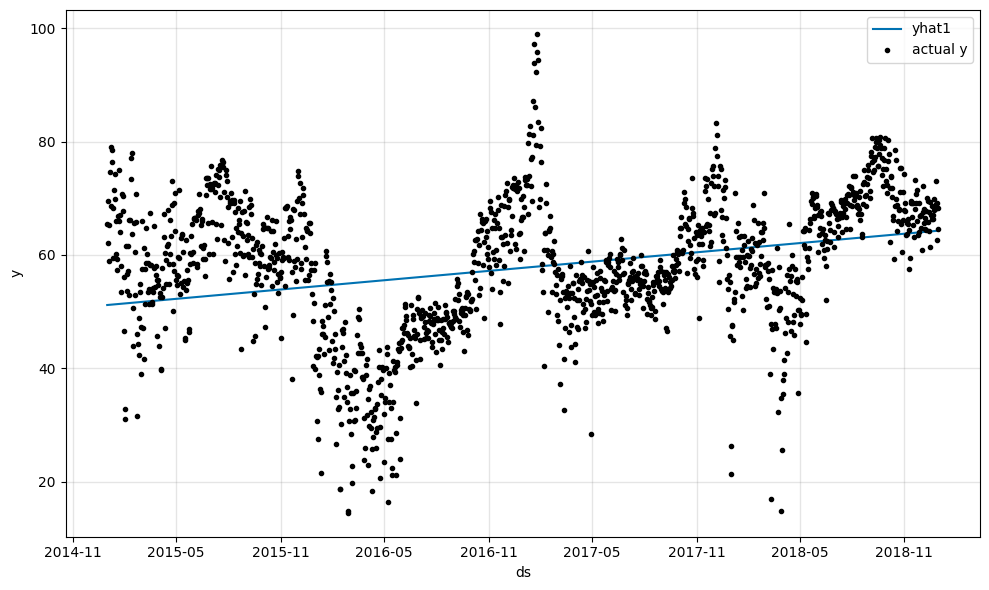

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

Let us enable the seasonality step by step again, starting with the yearly seasonality. We give it a try and then see what effects it has on the model.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

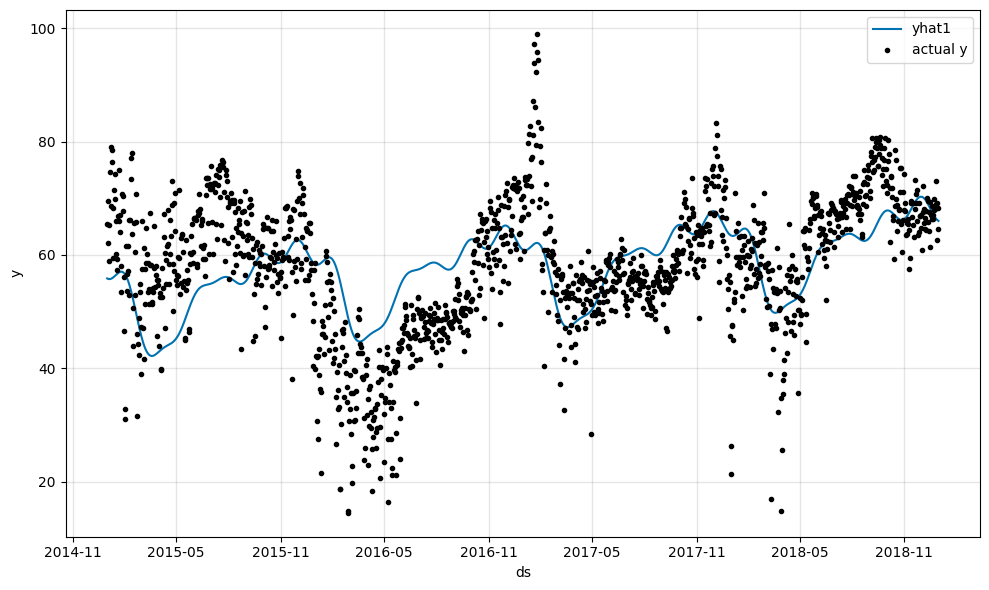

In [2]:
# Model and prediction with yearly seasonality
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Disable seasonality components, except yearly
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

Plotting all components of the forecast we see that the forecast is composed of the trend and the newly added seasonality in an additive way. This means our prediction $\hat{y}$ is the sum of the trend and the seasonality:

$$\text{Prediction}(t) = \hat{y}(t) = \text{Trend}(t) + \text{Seasonality}_{yearly}(t)$$

We can see this more cleary when we plot the trend and the seasonality components separately.

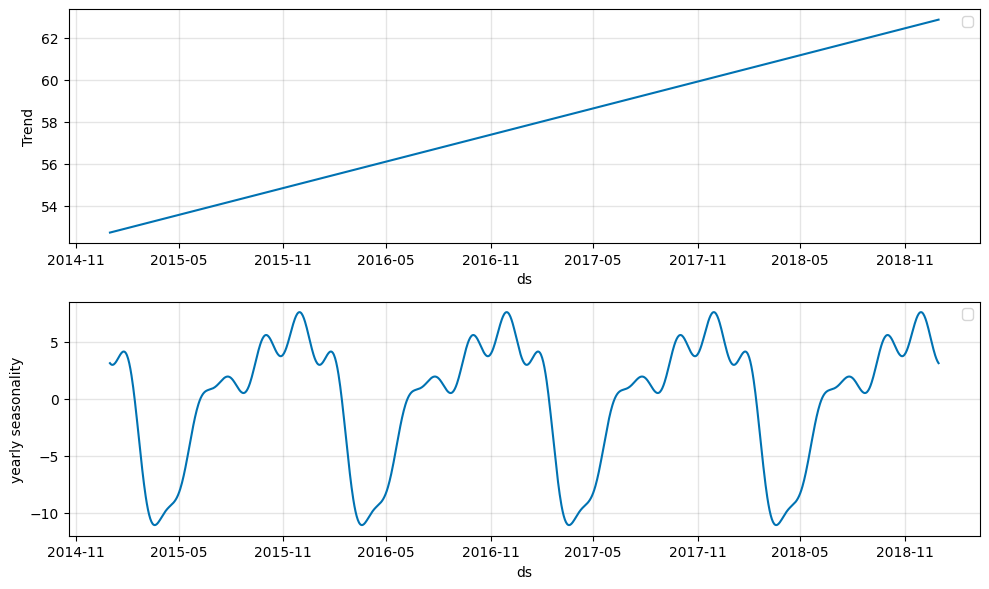

In [3]:
fig = m.plot_components(forecast)

An alternative way is to plot the forecast parameters directly. In this visualization we see the contribution of each components independent of the whole dataset, meaning only a single year for the yearly seasonality.

The functions `plot_paramters` and `plot_components` allow you to specify which components to plot. So for the next visualizations we will focus on the seasonality alone (respectively not showing the trend).

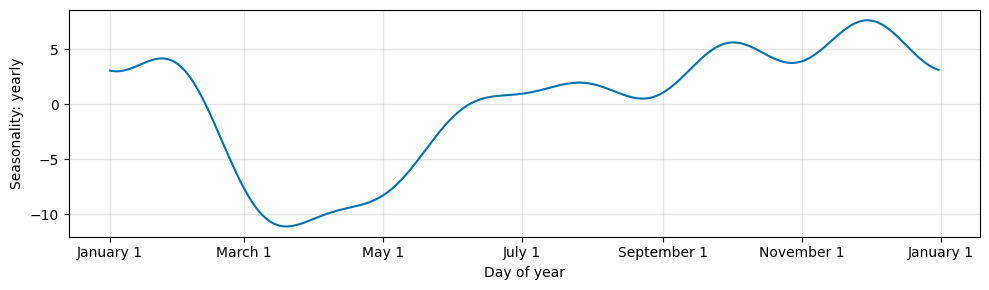

In [4]:
fig = m.plot_parameters(components=["seasonality"])

Seasonality in NeuralProphet is handled by using Fourier terms. You can think of Fourier terms as the sum of one or many overlayed sines and cosines functions. This way NeuralProphet can model multiple seasonalities. And the seasonality can be of arbitrary periodicities (length), for example a yearly seasonality with daily data ($p = 365.25$) or with weekly data ($p = 52.18$).

You can read more on [Fourier terms on Wikipedia](https://en.wikipedia.org/wiki/Fourier_series) and about the detailed inner workings of seasonality in the [paper on NeuralProphet](https://arxiv.org/abs/2001.04063) under section `2.1.2 Seasonality`.

We continue by enabling the `weekly` and `daily` seasonality.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

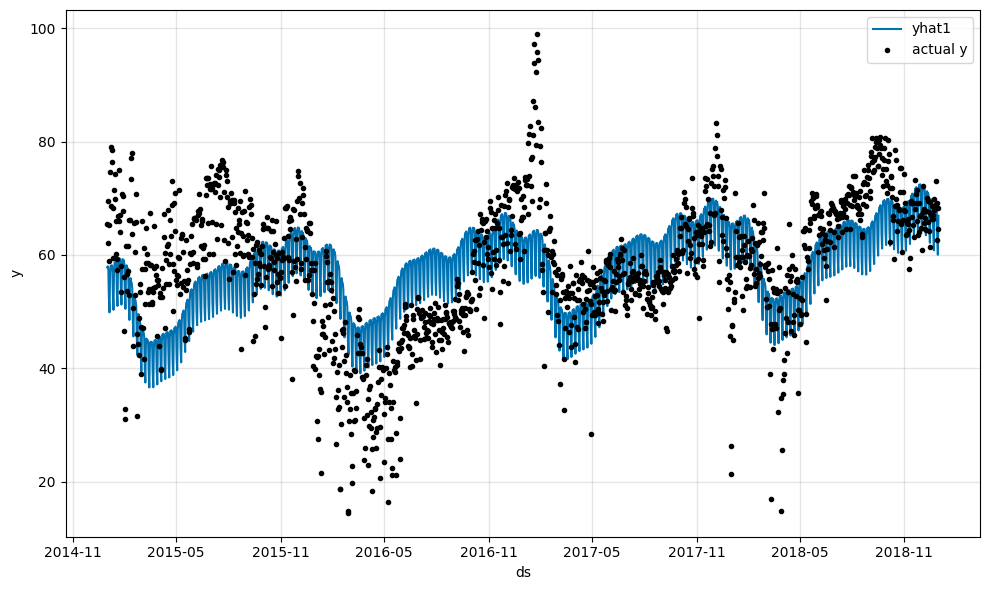

In [5]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Enable all seasonality components (default for NeuralProphet)
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

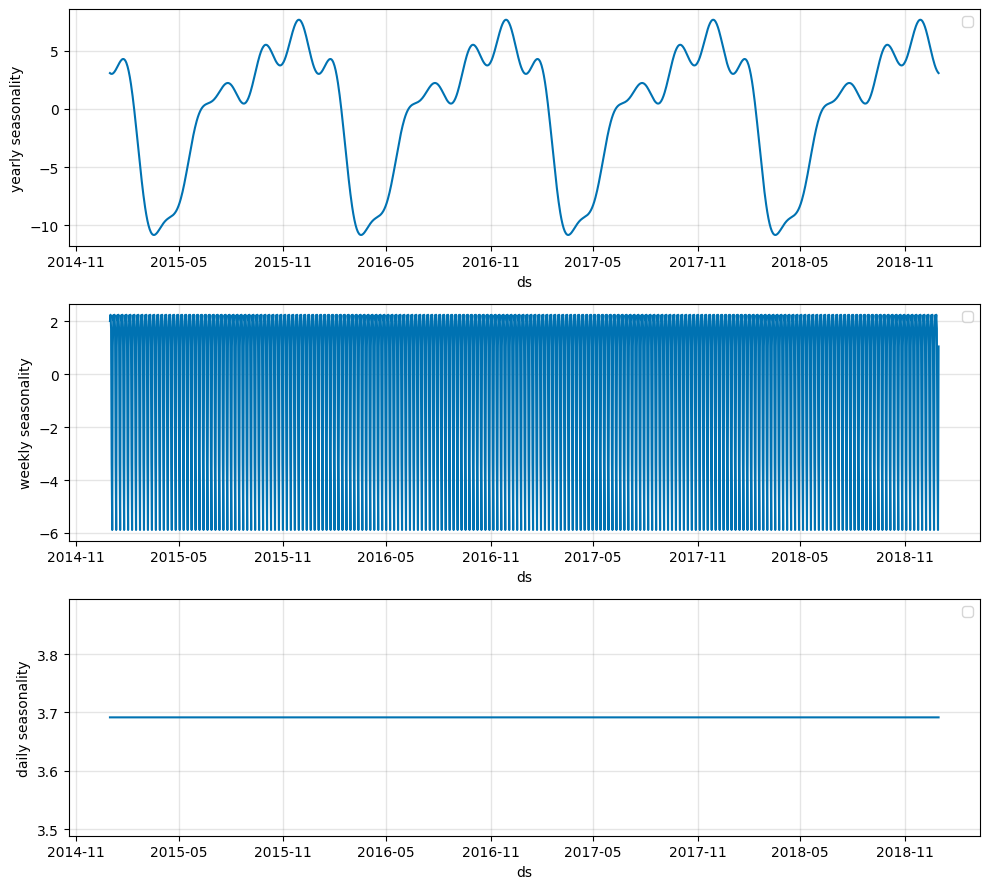

In [6]:
fig = m.plot_components(forecast, components=["seasonality"])

Daily seasonality does not make sense for this dataset. We see this clearly in the plotted as it only shows a flat line. For the weekly seasonality best zoom in or check out the plotted paramters below.

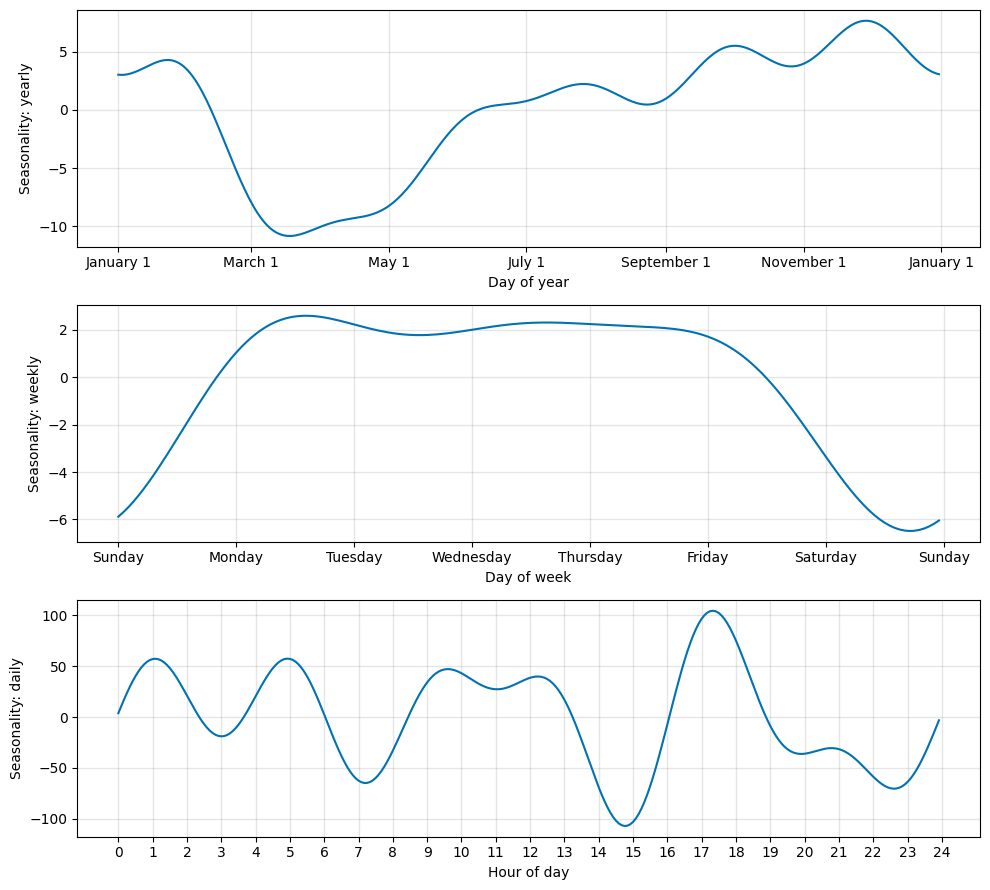

In [7]:
fig = m.plot_parameters(components=["seasonality"])